# Crash Dummies: Identifying High Risk Areas from NYC Traffic Conditions
## *EDA Maps of Crash Data*

### Table of Contents

* [Topic 1](#topic-1)
* [Topic 2](#topic-2)

#### Import Libraries & Read in Data

In [1]:
## STANDARD 
import pandas as pd 
import numpy as np
import re
## VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns
## INTERACTIVE MAPS
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

## GEO LOCATION
import geopandas as gpd
from shapely.geometry import Point, Polygon

# ## preprocessing
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# from sklearn.feature_selection import SelectKBest, f_regression
# from sklearn.dummy import DummyClassifier
# ## modeling
# from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, ElasticNet
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
# from sklearn.svm import SVC, SVR
# from sklearn.naive_bayes import MultinomialNB
# ## trees
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
# from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, ExtraTreesClassifier, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, AdaBoostClassifier, GradientBoostingRegressor
# ## NLP
# from sklearn.feature_extraction.text import CountVectorizer
# ## analysis
# from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, make_scorer, f1_score, mean_squared_error

# ## options
# import sklearn
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 100
pd.set_option('max_colwidth', 100)

In [12]:
### read in data
df = pd.read_csv('../data/crashes_lincoln_tunnel.csv')
### creates pandas dataframe with geometry column
gdf = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))

In [16]:
gdf.shape

(2560, 10)

In [13]:
gdf.head(2)

,DATE,CRASH DATE,CRASH TIME,LATITUDE,LONGITUDE,LOCATION,BOROUGH,ZIP CODE,CONTRIBUTING FACTOR VEHICLE 1,geometry
0,2019-01-01 02:30:00,01/01/2019,2:30,40.749706,-73.991570,"(40.749706, -73.99157)",MANHATTAN,10001.0,Passing or Lane Usage Improper,POINT (-73.99157 40.74971)
1,2019-01-01 04:23:00,01/01/2019,4:23,40.761500,-73.997826,"(40.7615, -73.997826)",NaN,NaN,Driver Inattention/Distraction,POINT (-73.99783 40.76150)


In [14]:
### Create sample of crash data to work with
sample_size = 2_000
gdf_sample = gdf.sample(sample_size)

In [15]:
### reduce columns
red_cols = ['DATE', 'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'geometry']

## Topic 1 <a class="anchor" id="topic-1"></a>
<hr/>

#### Geo Calculations for Custom Polygon

In [6]:
# Lat & Long lincoln_tunnel custom ploy

cords =  [(-74.000009, 40.763306),( -73.985957,40.757391),( -73.992627, 40.747933), (-74.006919,40.754636)]


In [7]:
# creating polygon 

lincoln_tunnel = Polygon(cords)

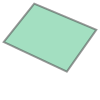

In [8]:
# custom poly for NYC 

lincoln_tunnel

## Map <a class="anchor" id="Map"></a>
<hr/>

In [17]:
# Map that clusters the crashes 

def color_producer(val):
    if val == 'Driver Inattention/Distraction':
        return 'darkred'
    if val == 'Passenger Distraction':
        return 'orange'
    if val == 'Passing or Lane Usage Improper':
        return 'blue'
    if val == 'Following Too Closely':
        return 'pink'
    else:
        return 'forestgreen'




m_2 = folium.Map(location=[40.758017, -73.998543], tiles='cartodbpositron', zoom_start=14.5)

mc = MarkerCluster()
for idx, row in df.iterrows():
    #if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
    mc.add_child(Marker([row['LATITUDE'], row['LONGITUDE']]))
m_2.add_child(mc)

for i in range(0,len(df)):
    Circle(
        location=[df.iloc[i]['LATITUDE'], df.iloc[i]['LONGITUDE']],
        radius=10,
        color=color_producer(df.iloc[i]['CONTRIBUTING FACTOR VEHICLE 1'])).add_to(m_2)

m_2

## Topic 2 <a class="anchor" id="topic-2"></a>
<hr/>